# __K - Nearest Neighbour__

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
for i in df:
    print(i,':' ,df[i].unique())

buying : ['vhigh' 'high' 'med' 'low']
maint : ['vhigh' 'high' 'med' 'low']
doors : [2 3 4 5]
persons : [2 4 6]
lug_boot : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
outcome : ['unacc' 'acc' 'vgood' 'good']


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


### Lets split the predictors and target

In [6]:
X = df.iloc[:,:-1]
y = df.outcome

print(X.head(), y.head())

  buying  maint  doors  persons lug_boot safety
0  vhigh  vhigh      2        2    small    low
1  vhigh  vhigh      2        2    small    med
2  vhigh  vhigh      2        2    small   high
3  vhigh  vhigh      2        2      med    low
4  vhigh  vhigh      2        2      med    med 0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: outcome, dtype: object


### Label Encoding

There is a lot of string dtype which needs to be converted to number as it is obvious that our computer cannot really understand a word thats the reason why the word is a sequence data type

Label encoding to the rescue

What it does is that it converts each unique type of string and assigns it a number and then returns an array of numbers for our feature that is object data type

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [8]:
X.buying = le.fit_transform(X.buying)

In [9]:
X.maint = le.fit_transform(X.maint)
X.lug_boot = le.fit_transform(X.lug_boot)
X.safety = le.fit_transform(X.safety)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


# Train test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [11]:
X_train.shape

(1382, 6)

In [12]:
X_test.shape

(346, 6)

# Now lets test our KNN model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [14]:
y_predict = model.predict(X_test)
y_predict.shape

(346,)

# Evaluation

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_predict)

0.9017341040462428

In [16]:
confusion_matrix(y_test, y_predict)

array([[ 55,   0,  16,   0],
       [  7,   5,   0,   0],
       [  9,   0, 242,   0],
       [  2,   0,   0,  10]])

In [17]:
pd.crosstab(y_test, y_predict)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,55,0,16,0
good,7,5,0,0
unacc,9,0,242,0
vgood,2,0,0,10


In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         acc       0.75      0.77      0.76        71
        good       1.00      0.42      0.59        12
       unacc       0.94      0.96      0.95       251
       vgood       1.00      0.83      0.91        12

    accuracy                           0.90       346
   macro avg       0.92      0.75      0.80       346
weighted avg       0.90      0.90      0.90       346



In [19]:
from seaborn import heatmap

<AxesSubplot:xlabel='col_0', ylabel='outcome'>

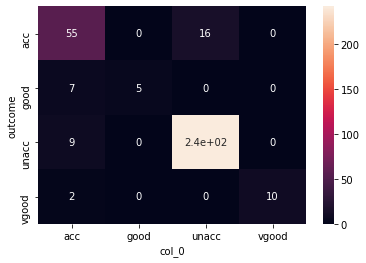

In [20]:
heatmap(pd.crosstab(y_test, y_predict), annot=True)